In [15]:
import operator
import chess
import torch
from torch import nn
import numpy as np

from back import encryption_board, give_moves_prob
from models import SkyNetModel, Node

In [2]:
chessboard = chess.Board()
print(str(chessboard))

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


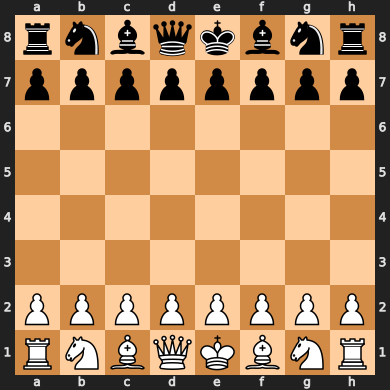

In [3]:
chessboard

In [4]:
SkyNet = SkyNetModel()

In [5]:
class MCTS:
    def __init__(self):
        self.root = Node()
        self.chessboard = chess.Board()
    #
    # def iteration_of_tree(self):
    #
    #     probability, value = SkyNet(encryption_board(self.chessboard))

In [6]:
encrypt_board, inp = encryption_board(chessboard)
probability, value = SkyNet(inp)
probability

tensor([[[[0.1600, 0.1529, 0.1682, 0.1670, 0.1495, 0.1798, 0.1834, 0.1631],
          [0.1667, 0.1393, 0.1323, 0.1040, 0.1462, 0.2325, 0.1716, 0.1818],
          [0.1458, 0.1183, 0.1579, 0.1206, 0.1673, 0.1523, 0.1252, 0.1330],
          [0.1739, 0.1293, 0.2081, 0.1695, 0.1781, 0.1687, 0.1890, 0.1708],
          [0.1575, 0.1434, 0.1809, 0.1742, 0.1024, 0.1381, 0.1244, 0.1640],
          [0.1516, 0.1580, 0.1536, 0.1614, 0.1530, 0.1878, 0.1509, 0.1957],
          [0.1531, 0.1370, 0.1420, 0.1713, 0.1463, 0.1519, 0.1445, 0.1590],
          [0.1556, 0.1377, 0.1556, 0.1187, 0.1617, 0.1392, 0.1424, 0.1312]],

         [[0.1223, 0.1050, 0.1212, 0.1119, 0.1053, 0.1263, 0.1314, 0.1194],
          [0.1240, 0.1000, 0.1119, 0.1124, 0.1157, 0.1690, 0.1277, 0.1295],
          [0.1142, 0.1301, 0.1457, 0.1037, 0.1282, 0.1161, 0.0923, 0.1034],
          [0.1237, 0.1177, 0.2043, 0.1370, 0.1445, 0.1764, 0.1562, 0.1310],
          [0.1143, 0.1047, 0.1474, 0.1333, 0.0865, 0.1216, 0.1075, 0.1233],
          

In [7]:
moves = list(chessboard.legal_moves)
moves_prob = give_moves_prob(moves, probability, encrypt_board)
moves_prob

{'g1h3': 0.10342205315828323,
 'g1f3': 0.11605619639158249,
 'b1c3': 0.14565737545490265,
 'b1a3': 0.11419877409934998,
 'h2h3': 0.15441371500492096,
 'g2g3': 0.1331256479024887,
 'f2f3': 0.14451998472213745,
 'e2e3': 0.14376594126224518,
 'd2d3': 0.1876734495162964,
 'c2c3': 0.12632539868354797,
 'b2b3': 0.15462379157543182,
 'a2a3': 0.14664189517498016,
 'h2h4': 0.15829318761825562,
 'g2g4': 0.12382809072732925,
 'f2f4': 0.12726980447769165,
 'e2e4': 0.15909269452095032,
 'd2d4': 0.14193372428417206,
 'c2c4': 0.1271321177482605,
 'b2b4': 0.1479365974664688,
 'a2a4': 0.16581597924232483}

In [8]:
root = Node()
root.Value = value.item()

In [9]:
root.leaf_expansion(moves_prob)

In [10]:
root.show_children()

d2d3 - 0.188
h2h4 - 0.158
e2e4 - 0.159
a2a4 - 0.166


In [18]:
max(root.upper_confidence_bounds().items(), key=operator.itemgetter(1))

0.27092891063206614

In [17]:
root.upper_confidence_bounds()

{'d2d3': 0.27092891063206614,
 'h2h4': 0.24154864873402537,
 'e2e4': 0.24234815563672008,
 'a2a4': 0.2490714403580946}

In [ ]:
chessboard.push('h2h4')

AttributeError: 'str' object has no attribute 'from_square'